##  Libraries Used
### Authors:
Team 4:
- Stephen Panev
- Marin St
- Dayana Hristova
- Dimitar Lyubchev

In [94]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from lightgbm import LGBMClassifier
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import cycle
import random as r

## Read the data
We are using the financial distress data of companies. This is part of a Kaggle dataset which can be viewed in the following link: https://www.kaggle.com/shebrahimi/financial-distress

In [2]:
data = pd.read_csv('data/Financial Distress.csv')

In [3]:
data.shape

(3672, 86)

There are 3672 rows and 86 columns in the dataset. The names of the columns can be viewed below.Unfortunately most of the columns are not named with their descriptive names. The contain variable of financial and not financial nature. This will hider our analysis without using business logic.

In [4]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

You can view the columns they are mostly float64, but there are some int64 which will mean different categories.

## EDA (Exploratory Data Analysis)
We have a total of 422 companies in the dataset.

In [6]:
data['Company'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
data['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

There are 14 periods in total, although not all companies are present till the end. Below we can view the histogram of the Financial Distress Variable. There is clearly an outlier.

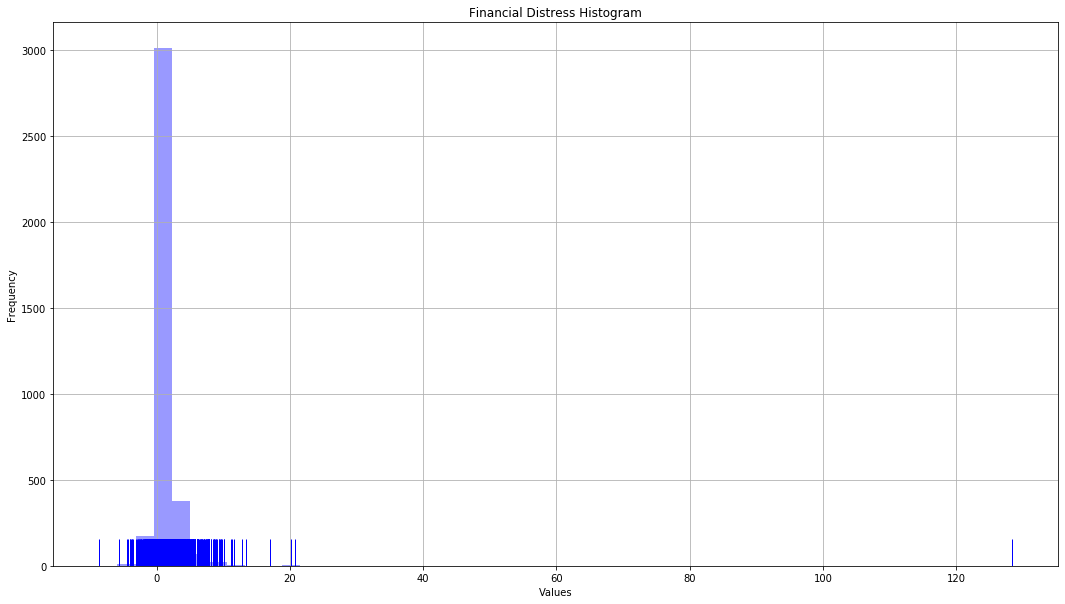

In [8]:
plt.figure(figsize=(18,10))
sns.distplot(data['Financial Distress'],kde=False, rug=True, color = 'blue');
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
data['Financial Distress'].describe()

count    3672.000000
mean        1.040257
std         2.652227
min        -8.631700
25%         0.172275
50%         0.583805
75%         1.351750
max       128.400000
Name: Financial Distress, dtype: float64

The descriptive statistics prove the point as well as the Boxplot. It is possible that the outlier is a flawed value.

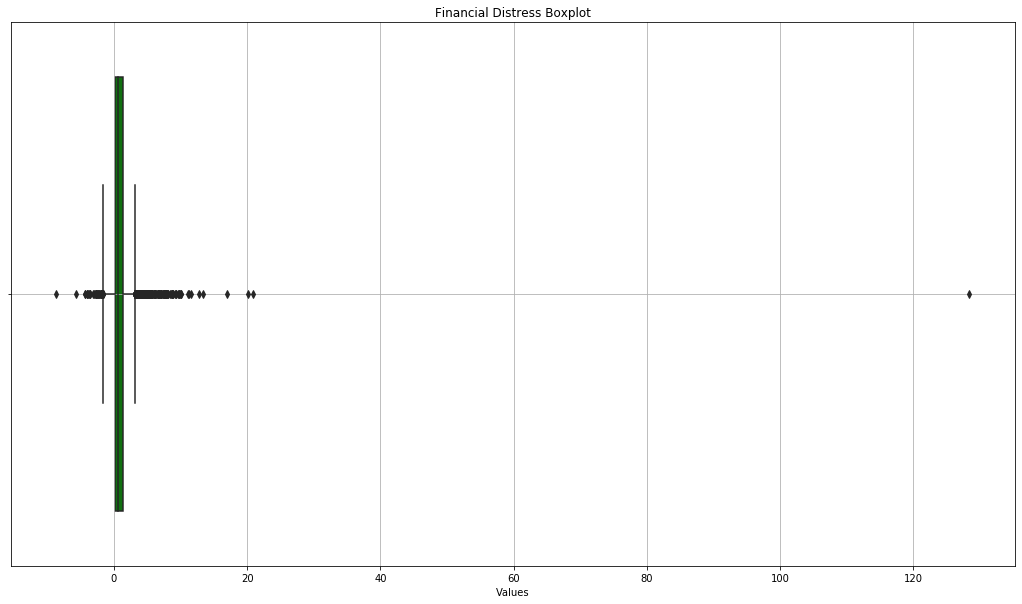

In [10]:
plt.figure(figsize=(18,10))
sns.boxplot(x=data['Financial Distress'], color = 'green')
plt.title('Financial Distress Boxplot')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [11]:
max(data['Financial Distress'])

128.4

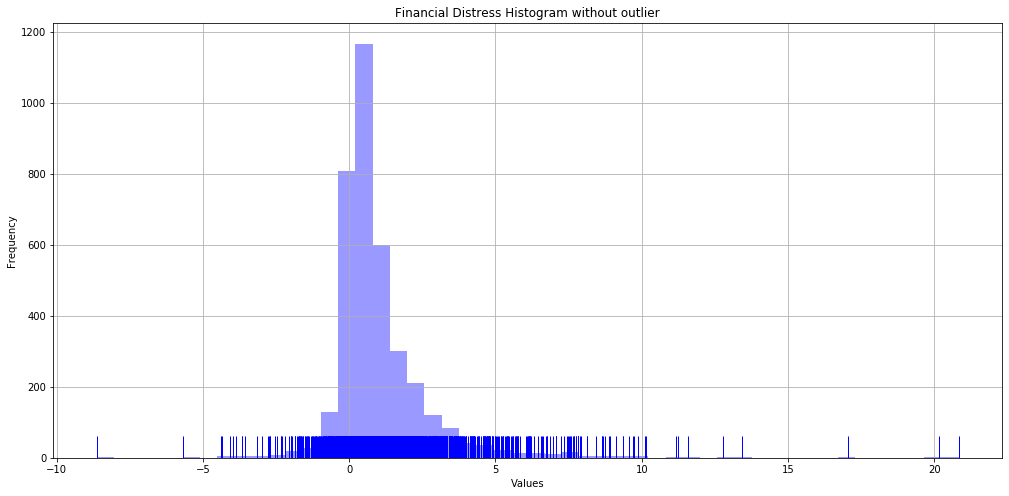

In [12]:
plt.figure(figsize=(17,8))
sns.distplot(data[data['Financial Distress'] < 100]['Financial Distress'], kde=False, rug=True, color = 'blue')
plt.title('Financial Distress Histogram without outlier')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

After removing the outlier value out distribution is more normal looking, although it is still slightly rightly skewed. We will cut the column into 3 categories with equal frequencies. We can get the precise border areas of the bins. 

In [13]:
pd.qcut(data['Financial Distress'], 3).value_counts()

(1.021, 128.4]     1224
(0.295, 1.021]     1224
(-8.633, 0.295]    1224
Name: Financial Distress, dtype: int64

In [14]:
data['status'] = np.where(data['Financial Distress'] < 0.295,0,np.where(data['Financial Distress'] < 1.021, 1,2))

In [15]:
data['status'].value_counts()

2    1225
1    1224
0    1223
Name: status, dtype: int64

## Selecting data for modeling
This is a panel data so we have to deal with time. We select the last period of every company that we will use for modeling. Another holdout dataset for testing will be produced this is for the first period of the companies. We need to check if the last period is representative for every period. If this is not the case, it means we are losing information in the process and we need to think about an alternative process.

In [16]:
data_one_period = data.drop_duplicates(subset=['Company'], keep='last')

In [17]:
data_one_period_test = data.drop_duplicates(subset=['Company'], keep='first')
data_final_test = data_one_period.drop(['Financial Distress', 'Company'], axis=1)
data_final_test.head()

,Time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,14,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,0.358880,0.54909,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,1,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,-0.056892,-0.16793,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,14,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,0.189140,0.17053,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,14,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,0.249060,0.28215,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [18]:
data_one_period.shape

(422, 87)

In the selected for modeling part of the dataset (data_one_period) we have 422 rows and 87 columns. Here we have the following distribution of the financial distress which we have converted into the status column. Unlike the original split proposed by Kaggles team this is far more balanced.

In [19]:
data_one_period['status'].value_counts()

0    231
1    102
2     89
Name: status, dtype: int64

In [20]:
data_one_period.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,1,4,-0.56657,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,2,14,2.23200,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,3,1,-1.65990,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,4,14,1.27700,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,5,14,1.63780,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [21]:
data_final = data_one_period.drop(['Financial Distress', 'Company'], axis=1)

The none useful column will be dropped. Here is a preview. Below that we have produced a heatmap of the correlation matrix. It is very large and it will not be very useful, so it is comment out.

In [22]:
data_final.head()

,Time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,14,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,0.358880,0.54909,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,1,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,-0.056892,-0.16793,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,14,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,0.189140,0.17053,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,14,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,0.249060,0.28215,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [23]:
#plt.figure(figsize=(20,10))
#plt.title('Correlation Matrix')
#sns.heatmap(data_final.corr(), annot=True)
#plt.show()

Now we will use the correlation coefficients for variable selection. Here are the correlations of the predictors against the status column in absolute values sorted in ascending order. We choose to select the values with the correlation coefficient higher then 10%, but lower then 70%.

In [24]:
abs(data_final.corr()['status']).sort_values(ascending=True)

x28       0.002354
x35       0.016076
x39       0.020654
x82       0.021716
x20       0.039651
            ...   
x5        0.605355
x81       0.609253
x2        0.620442
x10       0.739800
status    1.000000
Name: status, Length: 85, dtype: float64

In [25]:
variables = abs(data_final.corr()['status']).sort_values(ascending=True)

In [26]:
v1 = variables[0.05 < variables.values]
v2 = v1[v1.values < 0.7]
len(v2.index)

67

In [27]:
ind = v2.index
v2.index

Index(['x57', 'x42', 'x17', 'x22', 'x34', 'x40', 'x43', 'x11', 'x15', 'x7',
       'x58', 'x21', 'x1', 'x74', 'x44', 'x18', 'x12', 'x65', 'x56', 'x80',
       'x4', 'x41', 'x66', 'x33', 'x45', 'x30', 'x72', 'x29', 'x73', 'x71',
       'x54', 'x37', 'x24', 'x67', 'x55', 'x69', 'x6', 'x49', 'x14', 'x70',
       'x3', 'x13', 'x60', 'x26', 'x51', 'x63', 'x61', 'x23', 'x50', 'x79',
       'x46', 'x62', 'x64', 'Time', 'x77', 'x9', 'x78', 'x48', 'x36', 'x68',
       'x76', 'x75', 'x53', 'x25', 'x5', 'x81', 'x2'],
      dtype='object')

In [28]:
y = data_final['status']
X = data_final[ind]

In [29]:
X.shape

(422, 67)

We need to check about multicolinearity between the predictors. The VIF (Variance Inflation Factor) will be used.
A function has been written to help us with the variable selection. For the curious reader check more on the topic here https://en.wikipedia.org/wiki/Variance_inflation_factor.

In [30]:
def calc_vif(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
vif_df = calc_vif(X)
vif_df.shape

(67, 2)

In [32]:
vif_df_without_corr = vif_df[vif_df['VIF'] < 10]
vif_df_without_corr.shape

(17, 2)

We have chosen a cutoff rate of 10, it could be lower. Finally we get only 24 variables.

In [33]:
vif_df_without_corr['variables']

0     x57
1     x42
3     x22
5     x40
6     x43
8     x15
10    x58
14    x44
15    x18
16    x12
24    x45
30    x54
34    x55
42    x60
50    x46
55     x9
58    x36
Name: variables, dtype: object

In [34]:
X = X[vif_df_without_corr['variables']]
X.shape

(422, 17)

We produce a heatmap of the correlation matrix of the leftover values. We can see that there is no multicolinearity.

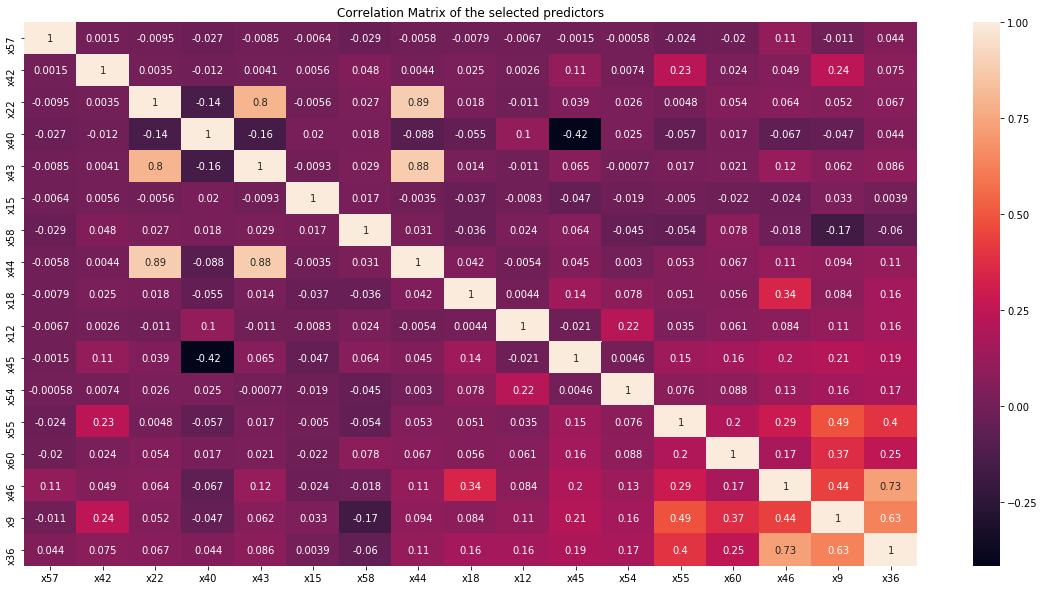

In [35]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix of the selected predictors')
sns.heatmap(X.corr(), annot=True)
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

Finally we have produces a test train slit with 30 percent test size. The random state of 42 has been used for reproduceability.

## Modeling on the selected data
Firstly we have tried scaling with the MinMaxScaler. This has not produced much improvement so, it has been dropped out. The predictors are not that different on the scales basis compared to each other.

In [37]:
#scaler =  MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

We have written a function evaluate the performance of the model using accuracy both on the training and test dataset, as well as the root mean squired error, and the classification report based on the confusion matrix, with the precision, recall, f1-score and support.

In [38]:
def evaluate(model, train_features, train_labels, test_features, test_labels):
    train_acc = model.score(train_features, train_labels)
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    accuracy = accuracy_score(test_labels, predictions)
    class_report = classification_report(test_labels, predictions)
    print('Model Performance')
    print('Training data performance {:0.2f}%'.format(train_acc))
    print('Root Mean Squired Error: {:0.2f}'.format(rmse))
    print('Test Accuracy: {:0.2f}%.'.format(accuracy))
    print(class_report)

The first model that we will use is the logistic regression. The results are not that impressive.

In [39]:
clf_base = LogisticRegression(random_state=42).fit(X_train, y_train)
evaluate(clf_base,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.53%
Root Mean Squired Error: 0.99
Test Accuracy: 0.45%.
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        60
           1       0.37      0.57      0.45        37
           2       0.16      0.10      0.12        30

    accuracy                           0.45       127
   macro avg       0.39      0.41      0.39       127
weighted avg       0.45      0.45      0.44       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
X_test_holdout = data_one_period_test[vif_df_without_corr['variables']]
X_test_holdout.shape

(422, 17)

Now we will test it on the hold out sample.

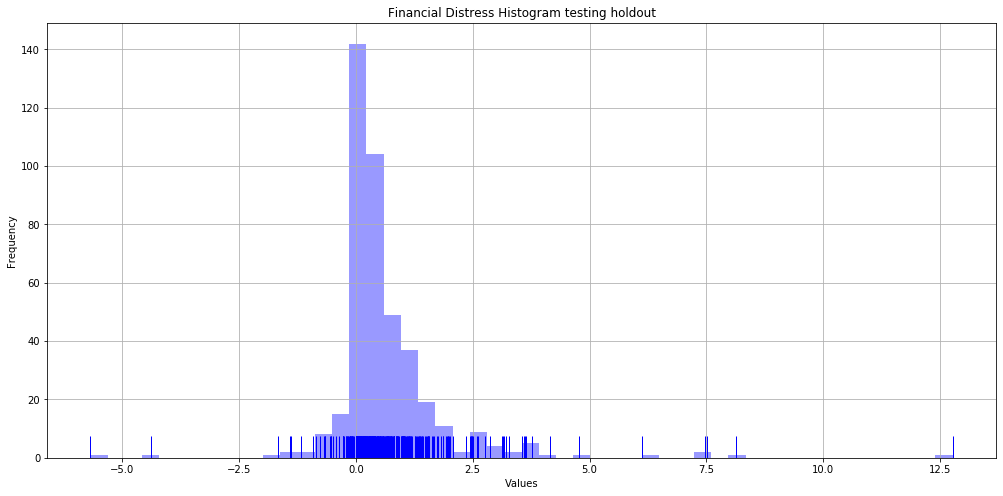

In [41]:
plt.figure(figsize=(17,8))
sns.distplot(data_one_period_test[data_one_period_test['Financial Distress'] < 100]['Financial Distress'],kde=False, rug=True, color = 'blue')
plt.title('Financial Distress Histogram testing holdout')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
data_one_period_test['status'] = np.where(data_one_period_test['Financial Distress'] < 0.295,0,
                                          np.where(data_one_period_test['Financial Distress'] < 1.021, 1,2))
y_test_holdout = data_one_period_test['status']
print(y_test_holdout.shape)
print(X_test_holdout.shape)

(422,)
(422, 17)


/home/stefan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The results are not that different, even better in this case.

In [43]:
clf_base = LogisticRegression(random_state=42).fit(X_train, y_train)
evaluate(clf_base,  X_train, y_train, X_test_holdout, y_test_holdout)

Model Performance
Training data performance 0.53%
Root Mean Squired Error: 0.95
Test Accuracy: 0.49%.
              precision    recall  f1-score   support

           0       0.50      0.83      0.63       192
           1       0.40      0.21      0.28       146
           2       0.60      0.18      0.28        84

    accuracy                           0.49       422
   macro avg       0.50      0.41      0.39       422
weighted avg       0.49      0.49      0.44       422



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Now we will create a Random Forest Classifier. The training performance is significantly better meaning there is overfitting. The holdout data proves further this issue.

In [44]:
rf_base = RandomForestClassifier(random_state=42).fit(X_train, y_train)
evaluate(rf_base,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.75
Test Accuracy: 0.65%.
              precision    recall  f1-score   support

           0       0.67      0.95      0.79        60
           1       0.53      0.24      0.33        37
           2       0.64      0.53      0.58        30

    accuracy                           0.65       127
   macro avg       0.61      0.58      0.57       127
weighted avg       0.62      0.65      0.61       127



In [45]:
evaluate(rf_base,  X_train, y_train, X_test_holdout, y_test_holdout)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.91
Test Accuracy: 0.54%.
              precision    recall  f1-score   support

           0       0.53      0.93      0.67       192
           1       0.59      0.11      0.18       146
           2       0.62      0.42      0.50        84

    accuracy                           0.54       422
   macro avg       0.58      0.48      0.45       422
weighted avg       0.57      0.54      0.47       422



Now it is time for the AdaBoost classifier. We still have overfitting but to a lesser extent.

In [46]:
ab_base = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
evaluate(ab_base,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.84%
Root Mean Squired Error: 0.62
Test Accuracy: 0.71%.
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        60
           1       0.56      0.51      0.54        37
           2       0.70      0.47      0.56        30

    accuracy                           0.71       127
   macro avg       0.68      0.64      0.65       127
weighted avg       0.70      0.71      0.69       127



In [47]:
ab_base = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
evaluate(ab_base,  X_train, y_train, X_test_holdout, y_test_holdout)

Model Performance
Training data performance 0.84%
Root Mean Squired Error: 0.84
Test Accuracy: 0.47%.
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       192
           1       0.38      0.53      0.44       146
           2       0.41      0.23      0.29        84

    accuracy                           0.47       422
   macro avg       0.47      0.43      0.43       422
weighted avg       0.49      0.47      0.47       422



We introduce the Support Vector Classifier. There are several kernels to choose from. They don't produce very high accuracy, so they will not be considered further. It should be noted that the linear kernel is slower compared to the other kernels.

In [48]:
sv_base_rbf = SVC(kernel='rbf').fit(X_train, y_train)
evaluate(sv_base_rbf,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.59%
Root Mean Squired Error: 1.11
Test Accuracy: 0.47%.
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        60
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        30

    accuracy                           0.47       127
   macro avg       0.16      0.33      0.21       127
weighted avg       0.22      0.47      0.30       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
sv_base_sig = SVC(kernel='sigmoid').fit(X_train, y_train)
evaluate(sv_base_sig,  X_train, y_train, X_test, y_test)

Model Performance
Training data performance 0.59%
Root Mean Squired Error: 1.07
Test Accuracy: 0.49%.
              precision    recall  f1-score   support

           0       0.48      0.98      0.64        60
           1       0.00      0.00      0.00        37
           2       1.00      0.10      0.18        30

    accuracy                           0.49       127
   macro avg       0.49      0.36      0.28       127
weighted avg       0.46      0.49      0.35       127



In [50]:
#sv_base_lin = SVC(kernel='linear').fit(X_train, y_train)
#evaluate(sv_base_lin,  X_train, y_train, X_test, y_test)

This is the extreme gradient booting classifier from another library different from sklearn. There is still the issue of overfitting.

In [51]:
xgb_model_base = xgb.XGBClassifier(objective="multi:softprob", random_state=42).fit(X_train, y_train)
evaluate(xgb_model_base, X_train, y_train, X_test, y_test)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.70
Test Accuracy: 0.68%.
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        60
           1       0.57      0.35      0.43        37
           2       0.65      0.57      0.61        30

    accuracy                           0.68       127
   macro avg       0.65      0.62      0.62       127
weighted avg       0.66      0.68      0.65       127



In [52]:
evaluate(xgb_model_base, X_train, y_train, X_test_holdout, y_test_holdout)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.88
Test Accuracy: 0.55%.
              precision    recall  f1-score   support

           0       0.54      0.92      0.68       192
           1       0.54      0.14      0.22       146
           2       0.63      0.44      0.52        84

    accuracy                           0.55       422
   macro avg       0.57      0.50      0.47       422
weighted avg       0.56      0.55      0.49       422



The last model to consider is the Light Gradient Boosting classifier. There is still the issue of overfitting.

In [53]:
lgb_model = LGBMClassifier(random_state=42).fit(X_train, y_train)
evaluate(lgb_model, X_train, y_train, X_test, y_test)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.66
Test Accuracy: 0.68%.
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        60
           1       0.52      0.30      0.38        37
           2       0.65      0.67      0.66        30

    accuracy                           0.68       127
   macro avg       0.63      0.63      0.62       127
weighted avg       0.65      0.68      0.65       127



In [54]:
evaluate(lgb_model, X_train, y_train, X_test_holdout, y_test_holdout)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.89
Test Accuracy: 0.55%.
              precision    recall  f1-score   support

           0       0.54      0.91      0.67       192
           1       0.53      0.14      0.23       146
           2       0.60      0.42      0.49        84

    accuracy                           0.55       422
   macro avg       0.56      0.49      0.46       422
weighted avg       0.55      0.55      0.48       422



Considering the finding we can infer that there there is a significant difference between the first and the last time period. So we must take another approach. We will take the mean of all the values for every company in the dataset.

## Model building of average data

In [55]:
data_average = data.groupby("Company", as_index=False).mean() 
data_average = data_average.drop(['Time'], axis=1)
data_average.shape

(422, 86)

In [56]:
data_average.head()

,Company,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
0,1,-0.334323,1.179250,-0.011305,0.869128,0.940075,0.035843,0.126302,0.564090,-0.018738,...,33.5625,32.486500,16.791750,15.750000,1.500000,22.0,-0.177584,31.5,50.5,0.000000
1,2,1.966056,1.539892,0.204816,0.628511,0.931229,0.302304,0.251645,1.068073,0.218296,...,92.1600,89.237286,17.770857,15.142857,-2.721429,29.0,1.895985,13.5,33.5,1.857143
2,3,-1.659900,0.874400,-0.034676,0.793500,0.609520,-0.002632,-0.086847,0.506090,-0.056892,...,27.0700,26.102000,16.000000,16.000000,0.200000,25.0,-0.303170,8.0,37.0,0.000000
3,4,0.839656,1.553275,0.138410,0.462178,0.759583,0.185367,0.168315,0.472444,0.171318,...,92.1600,89.237286,17.770857,15.142857,-2.721429,12.0,0.748936,34.5,50.5,1.142857
4,5,1.969673,1.127500,0.107643,0.743549,0.449420,0.108686,0.089244,0.664047,0.249389,...,92.1600,89.237286,17.770857,15.142857,-2.721429,23.0,1.921633,18.5,43.5,1.357143


We need to change the Time column with the full time. So we will drop the average age column and merge the tables with the one below to get the needed total Time periods.

In [57]:
time_to_merge = pd.DataFrame(data_one_period[['Company','Time']])
time_to_merge.head()

,Company,Time
3,1,4
17,2,14
18,3,1
32,4,14
46,5,14


In [58]:
data_average_with_time = pd.merge(time_to_merge,data_average, on='Company')
data_average_with_time.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
0,1,4,-0.334323,1.179250,-0.011305,0.869128,0.940075,0.035843,0.126302,0.564090,...,33.5625,32.486500,16.791750,15.750000,1.500000,22.0,-0.177584,31.5,50.5,0.000000
1,2,14,1.966056,1.539892,0.204816,0.628511,0.931229,0.302304,0.251645,1.068073,...,92.1600,89.237286,17.770857,15.142857,-2.721429,29.0,1.895985,13.5,33.5,1.857143
2,3,1,-1.659900,0.874400,-0.034676,0.793500,0.609520,-0.002632,-0.086847,0.506090,...,27.0700,26.102000,16.000000,16.000000,0.200000,25.0,-0.303170,8.0,37.0,0.000000
3,4,14,0.839656,1.553275,0.138410,0.462178,0.759583,0.185367,0.168315,0.472444,...,92.1600,89.237286,17.770857,15.142857,-2.721429,12.0,0.748936,34.5,50.5,1.142857
4,5,14,1.969673,1.127500,0.107643,0.743549,0.449420,0.108686,0.089244,0.664047,...,92.1600,89.237286,17.770857,15.142857,-2.721429,23.0,1.921633,18.5,43.5,1.357143


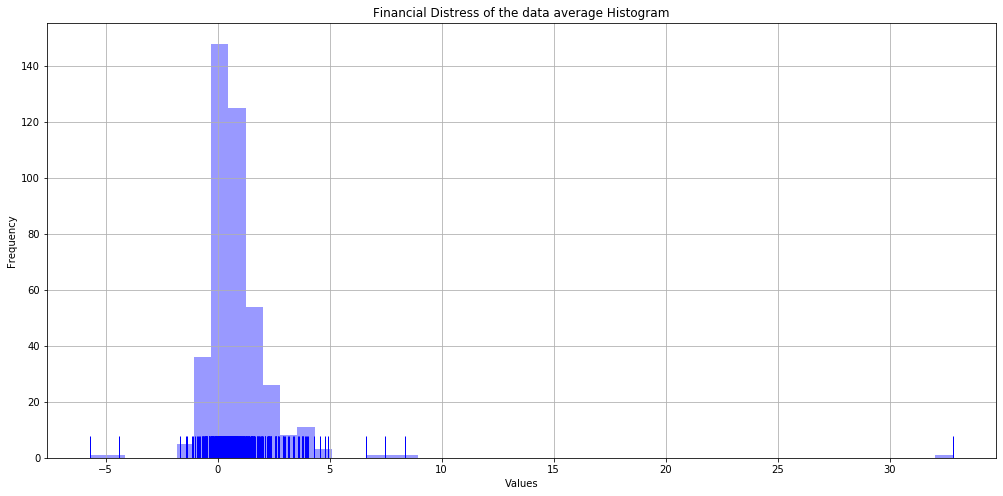

In [59]:
plt.figure(figsize=(17,8))
sns.distplot(data_average['Financial Distress'],kde=False, rug=True, color = 'blue')
plt.title('Financial Distress of the data average Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

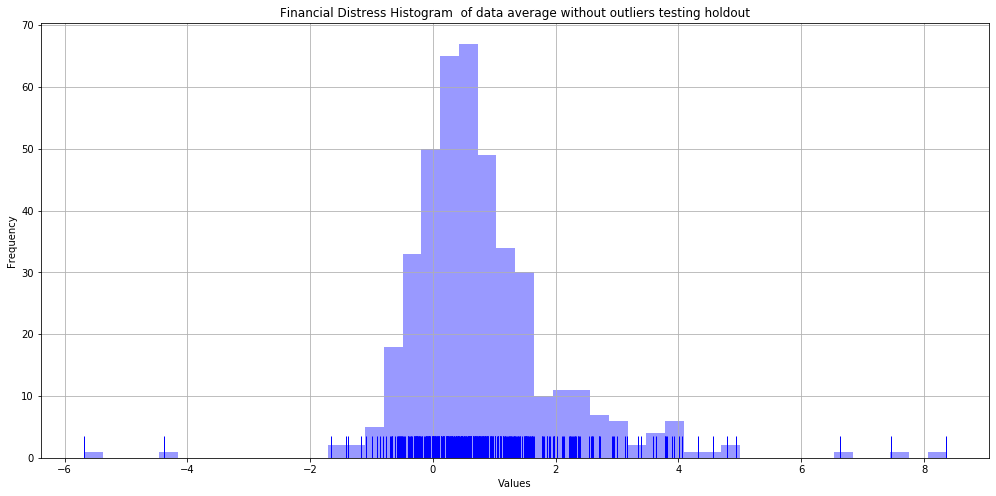

In [60]:
plt.figure(figsize=(17,8))
sns.distplot(data_average[data_average['Financial Distress'] < 10]['Financial Distress'],kde=False, rug=True, color = 'blue')
plt.title('Financial Distress Histogram  of data average without outliers testing holdout')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [61]:
pd.qcut(data_average['Financial Distress'], 3).value_counts()

(0.929, 32.813]                141
(-5.6850000000000005, 0.25]    141
(0.25, 0.929]                  140
Name: Financial Distress, dtype: int64

In [62]:
data_average['status'] = np.where(data_average['Financial Distress'] < 0.25,0,np.where(data_average['Financial Distress'] < 0.929, 1,2))

In [63]:
data_average = data_average.drop(['Financial Distress'], axis=1)

In [64]:
abs(data_average.corr()['status']).sort_values(ascending=True)

x83       0.011300
x42       0.012796
x47       0.013212
x82       0.015567
x35       0.015965
            ...   
x9        0.645239
x2        0.654896
x5        0.670634
x10       0.735160
status    1.000000
Name: status, Length: 85, dtype: float64

In [65]:
variables = abs(data_average.corr()['status']).sort_values(ascending=True)

In [66]:
v12 = variables[0.05 < variables.values]
v22 = v12[v12.values < 0.7]
len(v22.index)

71

In [67]:
ind1 = v22.index
v22.index

Index(['x8', 'x27', 'x19', 'x38', 'x32', 'x28', 'x80', 'x1', 'x39', 'x43',
       'x57', 'x44', 'x59', 'x41', 'x31', 'x45', 'x58', 'x20', 'x16', 'x78',
       'x52', 'x33', 'x7', 'x22', 'x30', 'x12', 'x18', 'x6', 'x56', 'x65',
       'x4', 'x21', 'x29', 'x24', 'x54', 'x66', 'x37', 'x63', 'x79', 'x49',
       'x72', 'x46', 'x14', 'x13', 'x3', 'x67', 'x26', 'x70', 'x48', 'x60',
       'x81', 'x77', 'x51', 'x55', 'x68', 'x76', 'x75', 'x69', 'x25', 'x50',
       'x23', 'x62', 'x71', 'x61', 'x64', 'x36', 'x73', 'x53', 'x9', 'x2',
       'x5'],
      dtype='object')

In [68]:
y1 = data_final['status']
X1 = data_final[ind1]

In [69]:
vif_df1 = calc_vif(X1)
vif_df1.shape

(71, 2)

We change the VIF threshold to 7 to remove the multicolinearity.

In [70]:
vif_df_without_corr1 = vif_df1[vif_df1['VIF'] < 7]
vif_df_without_corr1.shape

(13, 2)

In [71]:
X1 = X1[vif_df_without_corr1['variables']]
X1.shape

(422, 13)

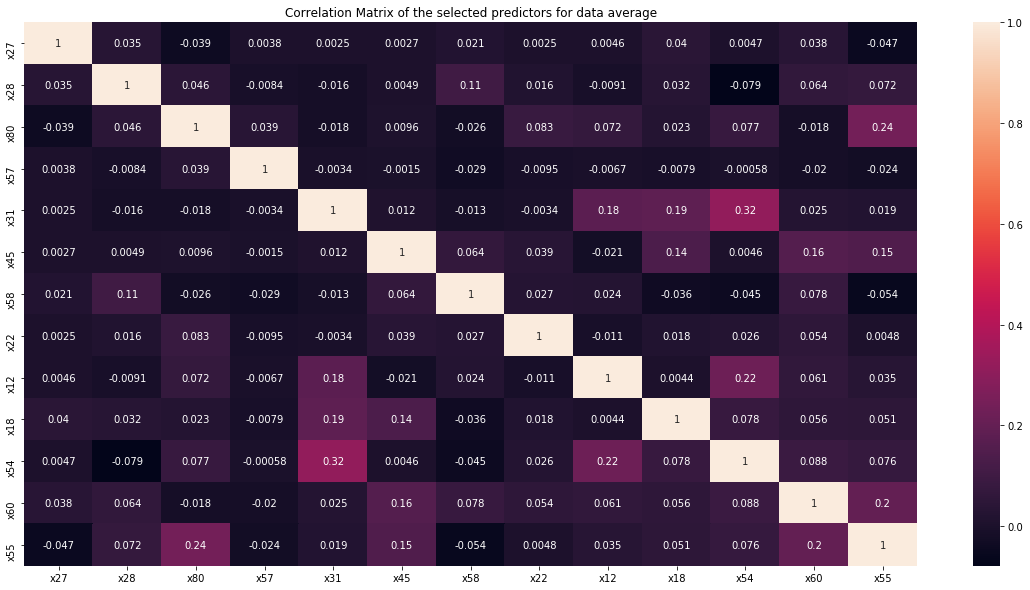

In [72]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix of the selected predictors for data average')
sns.heatmap(X1.corr(), annot=True)
plt.show()

In [73]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
     X1, y1, test_size=0.3, random_state=42)

A pipeline has been created with the model and polynomial features, you can review the results below, it seems to worsen the results, so we will not explore it further.

In [74]:
polynomial_features = PolynomialFeatures(degree=4,
                                             include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LogisticRegression(random_state=42))])

In [75]:
clf_avg = LogisticRegression(random_state=42).fit(X_train1, y_train1)
evaluate(clf_avg,  X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 0.59%
Root Mean Squired Error: 1.09
Test Accuracy: 0.50%.
              precision    recall  f1-score   support

           0       0.54      0.82      0.65        60
           1       1.00      0.05      0.10        37
           2       0.34      0.40      0.37        30

    accuracy                           0.50       127
   macro avg       0.63      0.42      0.38       127
weighted avg       0.63      0.50      0.43       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
clf_avg_pipe = pipeline.fit(X_train1, y_train1)
evaluate(clf_avg_pipe,  X_train1, y_train1, X_test1, y_test1)

/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Performance
Training data performance 0.58%
Root Mean Squired Error: 1.11
Test Accuracy: 0.47%.
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        60
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        30

    accuracy                           0.47       127
   macro avg       0.16      0.33      0.21       127
weighted avg       0.22      0.47      0.30       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
pipeline_rf = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", RandomForestClassifier(random_state=42))])

In [78]:
rf_avg = RandomForestClassifier(random_state=42).fit(X_train1, y_train1)
evaluate(rf_avg,  X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.78
Test Accuracy: 0.65%.
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        60
           1       0.57      0.32      0.41        37
           2       0.58      0.47      0.52        30

    accuracy                           0.65       127
   macro avg       0.61      0.57      0.57       127
weighted avg       0.63      0.65      0.62       127



In [79]:
rf_avg_pipe = pipeline_rf.fit(X_train1, y_train1)
evaluate(rf_avg_pipe,  X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.77
Test Accuracy: 0.60%.
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        60
           1       0.38      0.27      0.32        37
           2       0.46      0.43      0.45        30

    accuracy                           0.60       127
   macro avg       0.52      0.53      0.52       127
weighted avg       0.56      0.60      0.57       127



In [80]:
ab_avg = AdaBoostClassifier(random_state=42).fit(X_train1, y_train1)
evaluate(ab_avg,  X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 0.85%
Root Mean Squired Error: 0.76
Test Accuracy: 0.61%.
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        60
           1       0.43      0.32      0.37        37
           2       0.54      0.47      0.50        30

    accuracy                           0.61       127
   macro avg       0.56      0.55      0.55       127
weighted avg       0.59      0.61      0.60       127



In [81]:
sv_avg_rbf = SVC(kernel='rbf', random_state = 42).fit(X_train1, y_train1)
evaluate(sv_avg_rbf,  X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 0.58%
Root Mean Squired Error: 1.11
Test Accuracy: 0.47%.
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        60
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        30

    accuracy                           0.47       127
   macro avg       0.16      0.33      0.21       127
weighted avg       0.22      0.47      0.30       127



/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
xgb_model_avg = xgb.XGBClassifier(objective="multi:softprob", random_state=42).fit(X_train1, y_train1)
evaluate(xgb_model_avg, X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 0.99%
Root Mean Squired Error: 0.72
Test Accuracy: 0.62%.
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        60
           1       0.41      0.30      0.34        37
           2       0.56      0.50      0.53        30

    accuracy                           0.62       127
   macro avg       0.56      0.56      0.56       127
weighted avg       0.59      0.62      0.60       127



In [83]:
lgb_model_avg = LGBMClassifier(random_state=42).fit(X_train1, y_train1)
evaluate(lgb_model_avg, X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.76
Test Accuracy: 0.64%.
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        60
           1       0.50      0.32      0.39        37
           2       0.59      0.43      0.50        30

    accuracy                           0.64       127
   macro avg       0.59      0.56      0.56       127
weighted avg       0.61      0.64      0.61       127



In [84]:
pipeline_lgb = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LGBMClassifier(random_state=42))])

In [85]:
lgb_model_avg_pipe = pipeline_lgb.fit(X_train1, y_train1)
evaluate(lgb_model_avg_pipe, X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 1.00%
Root Mean Squired Error: 0.79
Test Accuracy: 0.63%.
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        60
           1       0.52      0.30      0.38        37
           2       0.53      0.57      0.55        30

    accuracy                           0.63       127
   macro avg       0.59      0.58      0.57       127
weighted avg       0.61      0.63      0.61       127



### Random Search with the best models
Grid search has been tried, but it takes to much time, so we will try the less computationally intensive random search with Random forest and the Light Gradient Boosting Classifier.

In [86]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [87]:
rf_random_avg = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42),param_distributions = params,
                                   n_iter = 100,cv = 3,random_state=42, n_jobs = -1)
rf_avg_tuned = rf_random_avg.fit(X_train1, y_train1)

In [88]:
rf_avg_tuned.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [89]:
rf_avg_final = RandomForestClassifier(random_state=42,n_estimators = 400,
 min_samples_split = 2,
 min_samples_leaf = 4,
 max_features = 'sqrt',
 max_depth = 70,
 bootstrap =True ).fit(X_train1, y_train1)
evaluate(rf_avg_final, X_train1, y_train1, X_test1, y_test1)

Model Performance
Training data performance 0.93%
Root Mean Squired Error: 0.78
Test Accuracy: 0.65%.
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        60
           1       0.59      0.27      0.37        37
           2       0.58      0.50      0.54        30

    accuracy                           0.65       127
   macro avg       0.61      0.57      0.57       127
weighted avg       0.63      0.65      0.61       127



The hyperparameters form PyCaret (check here for more information https://pycaret.org/) have been taken, but it seems that there are significantly lower results.
The results are not that good even after the hyperparameter tuning. We a loosing information when removing of averaging the different periods of the dataset. We will try to analyse the time series to see if there are any trends or seasonality.

## Time series

In [91]:
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935,1.000545
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563,0.816608
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000,0.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000,0.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000,1.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000,2.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000,2.000000


We can check the summary statistics of every column of the full dataset. Dimitar has stated that there are outlier values that impact significantly the financial distress variable. We will try to plot some of the values developing over time to check if there are trends.

In [93]:
data[data['Company'] == 2]

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
4,2,1,1.357300,1.06230,0.107020,0.81460,0.83593,0.19996,0.047800,0.74200,...,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27,2
5,2,2,0.007188,1.05580,0.081916,0.87949,0.68673,0.14263,0.043102,0.77198,...,31.31,30.194,17.000,16.0,0.4,29,1.357300,8,28,0
6,2,3,1.200200,0.97059,0.076064,0.90677,0.80980,0.16592,-0.024649,0.73660,...,36.07,35.273,17.000,15.0,-0.2,29,0.007188,9,29,2
7,2,4,2.234800,1.05900,0.130200,0.81811,0.87599,0.23445,0.045576,0.78727,...,39.80,38.377,17.167,16.0,5.6,29,1.200200,10,30,2
8,2,5,1.340500,1.12450,0.147840,0.75871,1.07990,0.27644,0.089408,0.80356,...,44.53,42.822,15.500,14.0,2.1,29,2.234800,11,31,2
9,2,6,2.047400,1.59980,0.262460,0.54615,1.31270,0.36948,0.296640,0.85364,...,52.74,49.206,15.500,12.0,-6.4,29,1.340500,12,32,2
10,2,7,2.345900,1.57560,0.262100,0.56448,1.15650,0.34862,0.299840,0.85817,...,66.12,59.471,18.000,12.0,-13.4,29,2.047400,13,33,2
11,2,8,2.249900,1.54430,0.240910,0.59073,1.07700,0.32561,0.301170,1.12100,...,73.20,63.880,16.000,12.0,1.2,29,2.345900,14,34,2
12,2,9,2.282600,1.72170,0.215250,0.55229,0.84101,0.29350,0.333360,1.28690,...,82.30,74.497,16.500,13.0,0.6,29,2.249900,15,35,2
13,2,10,1.798200,1.72320,0.208630,0.53398,0.78651,0.29303,0.329800,1.35480,...,100.00,100.000,17.125,14.5,-7.0,29,2.282600,16,36,2


In [108]:
data.columns[3:-1]

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83'],
      dtype='object')

In [116]:
data.loc[data['Company'] == 2].iloc[:,data.index[1]]

4      1
5      2
6      3
7      4
8      5
9      6
10     7
11     8
12     9
13    10
14    11
15    12
16    13
17    14
Name: Time, dtype: int64

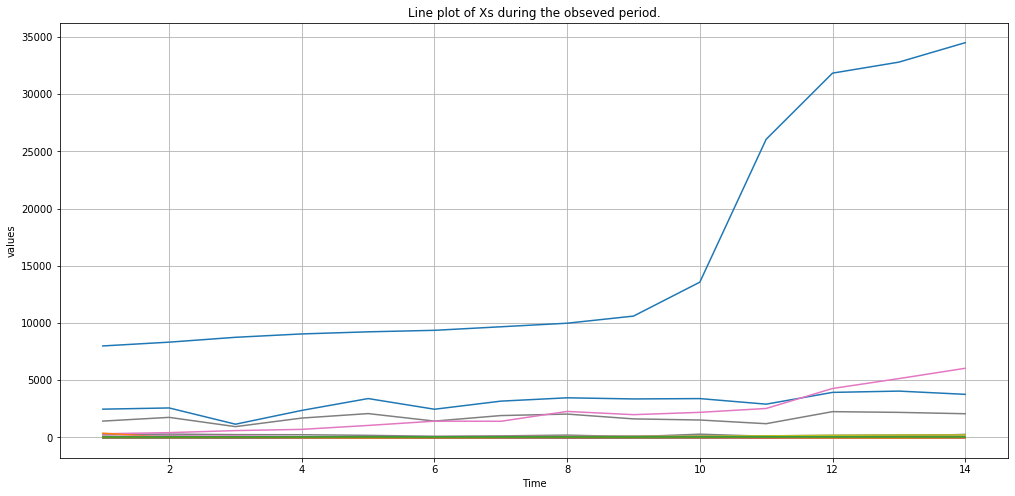

In [121]:
plt.figure(figsize=(17,8))
for i in range(len(data.columns[3:-1])):
    plt.plot(data.loc[data['Company'] == 2]['Time'], 
             data.loc[data['Company'] == 2].iloc[:,data.index[i]], label = 'i')
plt.title('Line plot of Xs during the obseved period.')
#plt.legend()
plt.xlabel('Time')
plt.ylabel('values')
plt.grid(True)
plt.show()

We can see some of the changes of the development of the predictors during the observed period. There are some changes, but every company needs to be investigated.

## Conclusion
The financial distress was binned into 3 equal parts.Several approaches have been tried. The first one was only using the last period. A lot of the models have significantly overfitted. Regularization needs to be implemented like tree pruning. There has been a discrepancy between the results using sklearn and PyCaret that needs to be investigated more thoroughly. The hold out dataset of a different period has been used to check the models and the results are lower, meaning we are loosing information when selecting only 1 period. So the average of all the periods has been used, this achieves accuracy of around 65% of the best models meaning that we again are loosing information.
<br>
The trajectory of every variable needs further investigation to see if there are trends, seasonality or idiosyncrasies.
<br>
To conclude the problem can be tried to be investigated as a regression problem, also binning might be implemented for the predictors. It is possible to view the the problem as a survival analysis problem https://en.wikipedia.org/wiki/Survival_analysis

## References
1. https://towardsdatascience.com
2. https://pandas.pydata.org/pandas-docs/stable/index.html
3. https://scikit-learn.org/stable/
4. https://www.analyticsvidhya.com/blog/
5. https://stackoverflow.com/
6. https://pycaret.org/
7. https://www.kaggle.com/shebrahimi/financial-distress
8. https://en.wikipedia.org/wiki/Main_Page